<a href="https://colab.research.google.com/github/Andreaierardi/Machine-Learning-Project/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [8]:
!kaggle datasets download --force -d moltean/fruits

 99% 756M/760M [00:07<00:00, 88.6MB/s]
100% 760M/760M [00:07<00:00, 103MB/s] 


In [9]:
!unzip fruits.zip


Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating: fruits-360/Training/Tomato 3/129_100.jpg

# Image classification with Neural Networks
## Machine Learning Project

Group: Andrea Ierardi, Emanuele Morales, Gregorio Luigi Saporito


## 1. The dataset
### 1.1 Libraries


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import random
import pandas as pd 

from plotnine import *
from sklearn.decomposition import PCA

from sklearn.datasets import load_files
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.utils import np_utils
from sklearn.utils import shuffle
import numpy as np

import matplotlib.pyplot as plt


# 1.1 Data Loading

In [2]:
DATADIR = "fruits-360/Training"
DATADIR_test = "fruits-360/Test"

TYPES = ["Apple", "Banana", "Plum", "Pepper", "Cherry", "Grape", "Tomato", "Potato", "Pear", "Peach"]
fruits = {}
def load_dataset(dire):
    fruits = {}
    images_as_array = []
    labels =[]
    for category in tqdm(os.listdir(dire)):
        for typ in TYPES:
            if(category.split()[0] == typ):
               # print(category, typ)
                fruits[category]= typ
                path = os.path.join(dire,category)
                class_num =TYPES.index(fruits[category])

                class_name = fruits[category]
                for img in tqdm(os.listdir(path)):
                   # print("OK: ",os.path.join(path,img) )
                    file = os.path.join(path,img)
                    #print(file, " -- ", dataset)
                    images_as_array.append(img_to_array(load_img(file,target_size=(32, 32))))
                    labels.append(class_num)
    images_as_array =  np.array(images_as_array)
    labels = np.array(labels)
    return images_as_array, labels

### Split in test and training sets




In [11]:
train = load_dataset(DATADIR)
test = load_dataset(DATADIR_test)

100%|██████████| 164/164 [00:00<00:00, 605.56it/s]

100%|██████████| 164/164 [00:00<00:00, 587.97it/s]

100%|██████████| 166/166 [00:00<00:00, 592.11it/s]

100%|██████████| 102/102 [00:00<00:00, 620.73it/s]

100%|██████████| 131/131 [00:24<00:00,  5.40it/s]


In [12]:
x_train, y_train= train

In [13]:
x_test, y_test = test

### Train and test shape


In [14]:
print('Train shape:')
print('X: ',x_train.shape)
print('y: ',y_train.shape)

print('Test shape')
print('X: ',x_test.shape)
print('y: ',y_test.shape)

Train shape:
X:  (32607, 32, 32, 3)
y:  (32607,)
Test shape
X:  (10906, 32, 32, 3)
y:  (10906,)


# 1.2 Pre-processing

### Pre-process the labels and the images


In [15]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

no_of_classes = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,no_of_classes)
y_test = np_utils.to_categorical(y_test,no_of_classes)

In [16]:
print(y_train[0:10])
print("Number of classes: ",no_of_classes)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Number of classes:  10


### Visualisation of the first 10 images


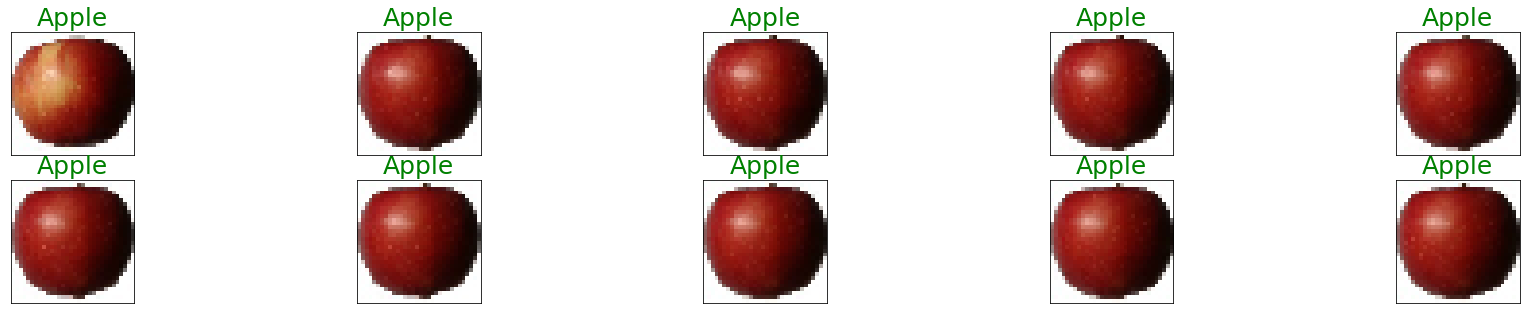

In [17]:

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})

### Suffle of the data


In [18]:
x_train,y_train = shuffle(x_train, y_train)
x_test,y_test = shuffle(x_test, y_test)

### Visualisation of the first 10 images shuffled


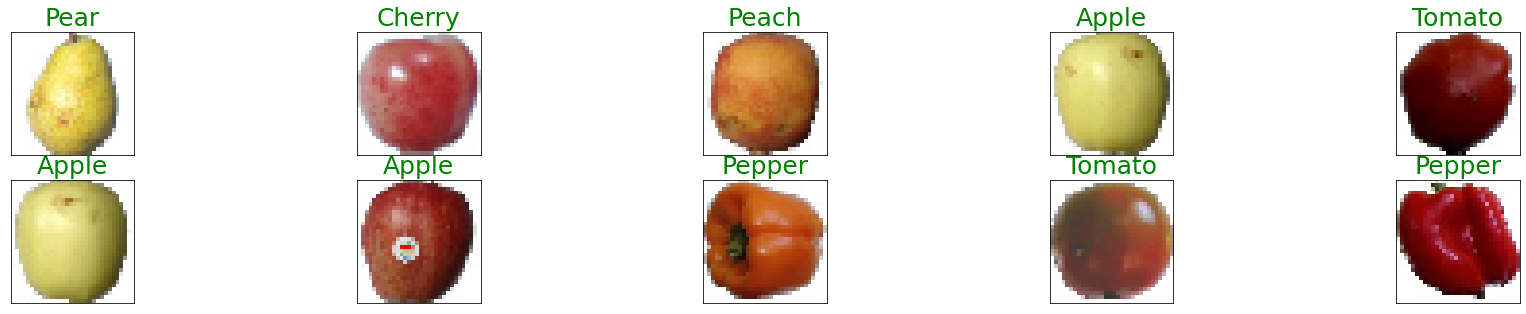

In [19]:

fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))
    ax.set_title("{}".format(TYPES[np.argmax(y_train[i])]),color=("green"),fontdict= {'fontsize': '25'})



### Split in validation and test set


In [20]:
# Using 80-20 rule
split = len(x_test)*80//100

print('Test len before split: ',len(x_test))
print('Validation split len:', split)

Test len before split:  10906
Validation split len: 8724


In [21]:
# Now, we have to divide the validation set into test and validation set
x_test,x_valid = x_test[split:],x_test[:split]
y_test,y_valid = y_test[split:],y_test[:split]
print('Train X : ',x_train.shape)
print('Train y :',y_train.shape)

print('1st training image shape ',x_train[0].shape)

print('Validation X : ',x_valid.shape)
print('Validation y :',y_valid.shape)
print('Test X : ',x_test.shape)
print('Test y : ',y_test.shape)

Train X :  (32607, 32, 32, 3)
Train y : (32607, 10)
1st training image shape  (32, 32, 3)
Validation X :  (8724, 32, 32, 3)
Validation y : (8724, 10)
Test X :  (2182, 32, 32, 3)
Test y :  (2182, 10)


### Definition of zero-one loss function 

In [22]:
def zero_one(prediz,test):
    y_hat = []
    y_t = []
    for i in range(len(prediz)):
        y_hat.append(np.argmax(prediz[i]))
        y_t.append(np.argmax(test[i]))

   
    loss = []
    for i in range(len(prediz)):
        if(y_hat[i] == y_t[i]):
            loss.append(0)
        else:
            loss.append(1)


    return np.mean(loss)


# 1.3 PCA and feed-forward NN


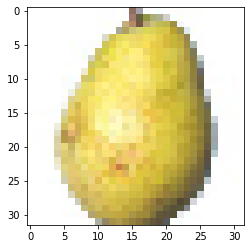

In [23]:
#attempt to plot image
plt.imshow(x_train[0])

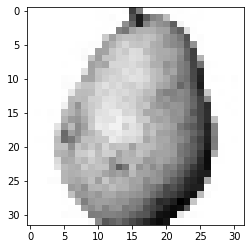

In [24]:
x_train[0].shape
type(x_train[1])
rgb_weights = [0.2989, 0.5870, 0.1140]
image_test = x_train[0]
image_grey = np.dot(image_test[...,:3], rgb_weights)
plt.imshow(image_grey, cmap=plt.get_cmap("gray"))

In [25]:
# transform my np.ndarray from rgb to grey
x_train_grey = np.ndarray(shape=(x_train.shape[0], 32, 32))
for i in range(x_train.shape[0]):
    image_convert = x_train[i]
    x_train_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

x_valid_grey = np.ndarray(shape=(x_valid.shape[0], 32, 32))
for i in range(x_valid.shape[0]):
    image_convert = x_valid[i]
    x_valid_grey[i] = np.dot(image_convert[...,:3], rgb_weights)
    
x_test_grey = np.ndarray(shape=(x_test.shape[0], 32, 32))
for i in range(x_test.shape[0]):
    image_convert = x_test[i]
    x_test_grey[i] = np.dot(image_convert[...,:3], rgb_weights)

In [26]:
# flatten my 32x32 images by concatenating them into a vector, each column of the matrix will be an image
x_train_flat = np.ndarray(shape=(1024, x_train_grey.shape[0]))
for i in range(x_train_grey.shape[0]):
    x_train_flat[:,i] = np.concatenate(x_train_grey[i])
    
x_valid_flat = np.ndarray(shape=(1024, x_valid_grey.shape[0]))
for i in range(x_valid_grey.shape[0]):
    x_valid_flat[:,i] = np.concatenate(x_valid_grey[i])
    
x_test_flat = np.ndarray(shape=(1024, x_test_grey.shape[0]))
for i in range(x_test_grey.shape[0]):
    x_test_flat[:,i] = np.concatenate(x_test_grey[i])

In [27]:
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
x_train_flat_T = standard_scaler.fit_transform(x_train_flat.T)
x_valid_flat_T = standard_scaler.transform(x_valid_flat.T)
x_test_flat_T = standard_scaler.transform(x_test_flat.T)

In [28]:
x_train_flat_T.shape

(32607, 1024)

In [29]:
x_train_flat = x_train_flat_T.T
x_valid_flat = x_valid_flat_T.T
x_test_flat = x_test_flat_T.T

In [30]:
x_train_flat.shape

(1024, 32607)

In [31]:
a = np.cov(x_train_flat)
b = np.linalg.eig(a)
b[0].shape

(1024,)

In [32]:
b

(array([384.41591328,  86.57192039,  60.39849467, ...,   0.        ,
          0.        ,   0.        ]),
 array([[-2.77148730e-03,  1.99671963e-02, -7.00245270e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.06770166e-04,  5.26867240e-03, -3.60037909e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.31497722e-04,  4.57673250e-03, -2.40477865e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 9.24994377e-04,  3.61739014e-03,  2.95348978e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.13335613e-03,  5.13559532e-03,  3.96259018e-03, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]))

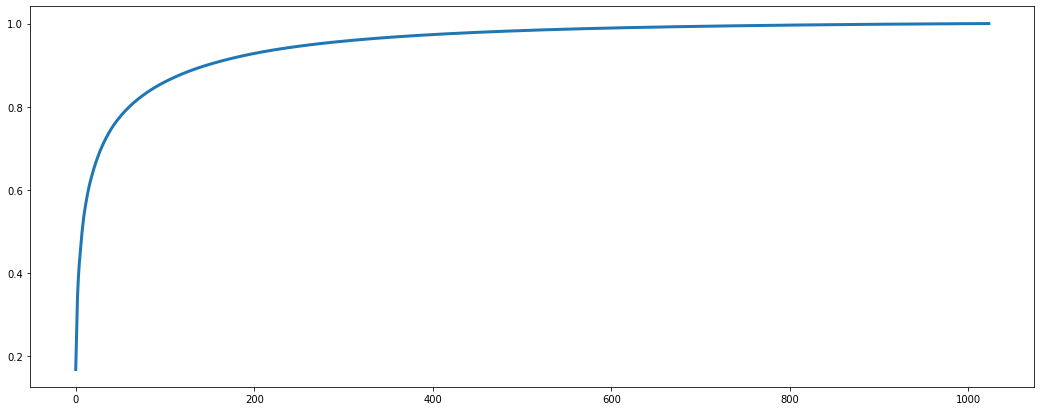

In [33]:
pca = PCA().fit(x_train_flat)
plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

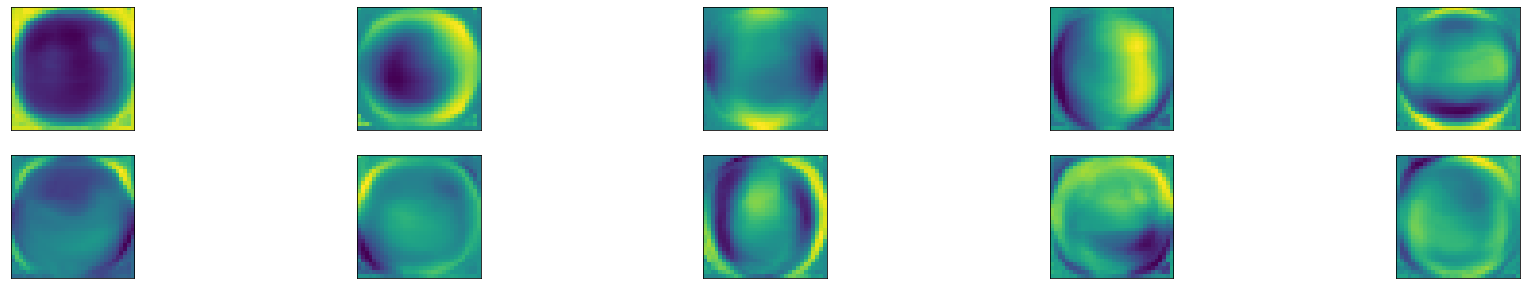

In [34]:
# try to plot some of the eigenvectors, the so called "eigenfruits"
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(b[1][:,i].reshape(32,32)))



### Reduce dimensionality of images with PCA


In [35]:
x_train_flat.shape, x_valid_flat.shape, x_test_flat.shape

((1024, 32607), (1024, 8724), (1024, 2182))

In [36]:

def PCA_iter(x_all,start, end, step):
    lis =[]
    for i in range(start, end, step):
                print("\n\n===== Component: ",i,"=====\n")
            
                (train,valid, test) = x_all
                pca = PCA(n_components=i)
                print("original shape:   ", train.shape)

                
                pca.fit_transform(train)
                
                train_PCA =  pca.transform(train)
                train_new = pca.inverse_transform(train_PCA)

                valid_PCA =  pca.transform(valid)       
                valid_new = pca.inverse_transform(valid_PCA)
                
                
                test_PCA = pca.transform(test)
                test_new = pca.inverse_transform(test_PCA)

                
                print("transformed shape:", train_PCA.shape)
                print("final shape:", train_new.shape)

                tupla = (x_train_PCA, x_valid_PCA, x_test_PCA) =train_new,valid_new,test_new
                
                lis.append(tupla)
    return lis

In [37]:
lis_PCA =  PCA_iter((x_train_flat_T,x_valid_flat_T, x_test_flat_T),10,211,20)



===== Component:  10 =====

original shape:    (32607, 1024)
transformed shape: (32607, 10)
final shape: (32607, 1024)


===== Component:  30 =====

original shape:    (32607, 1024)
transformed shape: (32607, 30)
final shape: (32607, 1024)


===== Component:  50 =====

original shape:    (32607, 1024)
transformed shape: (32607, 50)
final shape: (32607, 1024)


===== Component:  70 =====

original shape:    (32607, 1024)
transformed shape: (32607, 70)
final shape: (32607, 1024)


===== Component:  90 =====

original shape:    (32607, 1024)
transformed shape: (32607, 90)
final shape: (32607, 1024)


===== Component:  110 =====

original shape:    (32607, 1024)
transformed shape: (32607, 110)
final shape: (32607, 1024)


===== Component:  130 =====

original shape:    (32607, 1024)
transformed shape: (32607, 130)
final shape: (32607, 1024)


===== Component:  150 =====

original shape:    (32607, 1024)
transformed shape: (32607, 150)
final shape: (32607, 1024)


===== Component:  170 ==

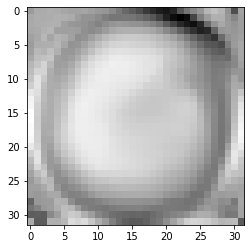

In [38]:
# with 10 components example of the same image
tr,va,te  = lis_PCA[1] 
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))

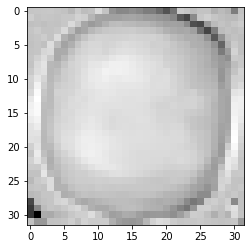

In [39]:
# with 210 components example of an image
tr,va,te  = lis_PCA[len(lis_PCA)-1]
plt.imshow(tr[2,:].reshape(32,32), cmap=plt.get_cmap("gray"))


## Train feed-forward NN with reduced images


In [40]:
def FW_iter(lis_PCA, ep, bs):
    lis_FW = []
    epochs = ep
    batch_size = bs
    for itr in range(len(lis_PCA)):
        x_train_PCA, x_valid_PCA, x_test_PCA = lis_PCA[itr]
        
       
        print("FW- components: ",(itr+1)*20-10)
        #feed forward neural network
        model = tf.keras.Sequential([
          tf.keras.layers.Input(shape = (1024)),
          tf.keras.layers.Dense(32, activation = "relu"),
          tf.keras.layers.Dense(10, activation='softmax')
          ])
        model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])
        #model.summary()

        history = model.fit(x_train_PCA, y_train,
                        batch_size = bs,
                        epochs = epochs,
                        validation_data=(x_valid_PCA, y_valid),
                        verbose = 2
                      )
        
        y_pred = model.predict(x_test_PCA).round()
        
        zo_loss = zero_one(y_pred,y_test)
        print("Zero-one loss: ",zo_loss)
        tupla = (history, model, zo_loss)
        lis_FW.append(tupla)
    return lis_FW

In [41]:
epochs = 10
batch_size = 32
res = FW_iter(lis_PCA, epochs, batch_size)

FW- components:  10
Epoch 1/10
1019/1019 - 4s - loss: 0.9220 - accuracy: 0.6776 - val_loss: 1.2049 - val_accuracy: 0.6434
Epoch 2/10
1019/1019 - 4s - loss: 0.6468 - accuracy: 0.7712 - val_loss: 1.2523 - val_accuracy: 0.6323
Epoch 3/10
1019/1019 - 4s - loss: 0.5647 - accuracy: 0.8023 - val_loss: 1.2392 - val_accuracy: 0.6804
Epoch 4/10
1019/1019 - 4s - loss: 0.5149 - accuracy: 0.8224 - val_loss: 1.2359 - val_accuracy: 0.6828
Epoch 5/10
1019/1019 - 4s - loss: 0.4826 - accuracy: 0.8331 - val_loss: 1.3118 - val_accuracy: 0.6669
Epoch 6/10
1019/1019 - 4s - loss: 0.4649 - accuracy: 0.8394 - val_loss: 1.1964 - val_accuracy: 0.7082
Epoch 7/10
1019/1019 - 4s - loss: 0.4397 - accuracy: 0.8501 - val_loss: 1.2202 - val_accuracy: 0.6989
Epoch 8/10
1019/1019 - 4s - loss: 0.4201 - accuracy: 0.8556 - val_loss: 1.3338 - val_accuracy: 0.7007
Epoch 9/10
1019/1019 - 4s - loss: 0.4065 - accuracy: 0.8617 - val_loss: 1.2639 - val_accuracy: 0.7086
Epoch 10/10
1019/1019 - 4s - loss: 0.3902 - accuracy: 0.8658 -

In [42]:
df = pd.DataFrame(
columns = ['epochs', 'valid', 'components', 'accuracy', 'value']
)

for itr in range(len(res)):
  
    time =  [i for i in range(1,epochs+1)]
    valids =  [0 for i in range(1,epochs+1)]
    components = [(itr+1)*20-10 for i in range(1,epochs+1)]
   

    accur = [1 for i in range(1,epochs+1)]
    acc = res[itr][0].history['accuracy']
    
    df1=  pd.DataFrame(data= np.vstack((time,valids,components,accur,acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    loss= res[itr][0].history['loss']
    accur = [0 for i in range(1,epochs+1)]
    df2=  pd.DataFrame(data= np.vstack((time,valids,components,accur,loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    valids =  [1 for i in range(1,epochs+1)]
    accur = [1 for i in range(1,epochs+1)]
    val_acc = res[itr][0].history['val_accuracy']
    
    df3=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_acc)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])

    accur = [0 for i in range(1,epochs+1)]

    val_loss = res[itr][0].history['val_loss']
    df4=  pd.DataFrame(data= np.vstack((time,valids,components,accur,val_loss)).T, columns = ['epochs', 'valid', 'components', 'accuracy', 'value'])
   
    df = df.append(df1.append(df2).append(df3).append(df4))

In [43]:
df['components'] = df['components'].astype('category')
df = df.assign(accuracy = ['accuracy' if accuracy == 1. else 'loss' for accuracy in df['accuracy']])
df = df.assign(valid = ['validation' if valid == 1. else 'training' for valid in df['valid']])
df['accuracy'].unique()

array(['accuracy', 'loss'], dtype=object)

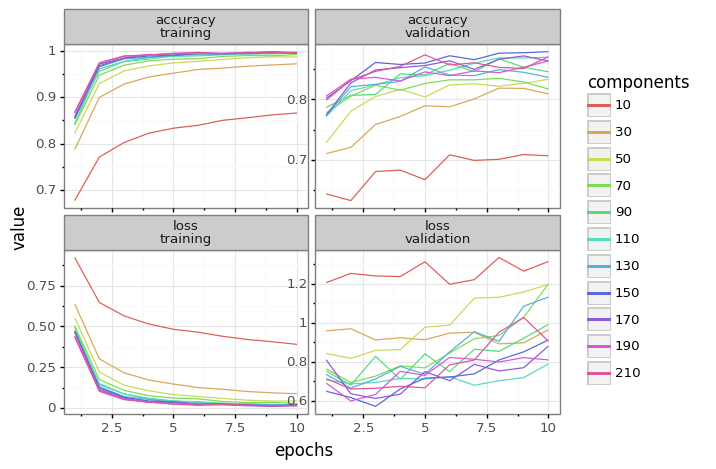

<ggplot: (8742526145842)>

In [44]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid'],scales='free') +  theme_bw(base_size=12)

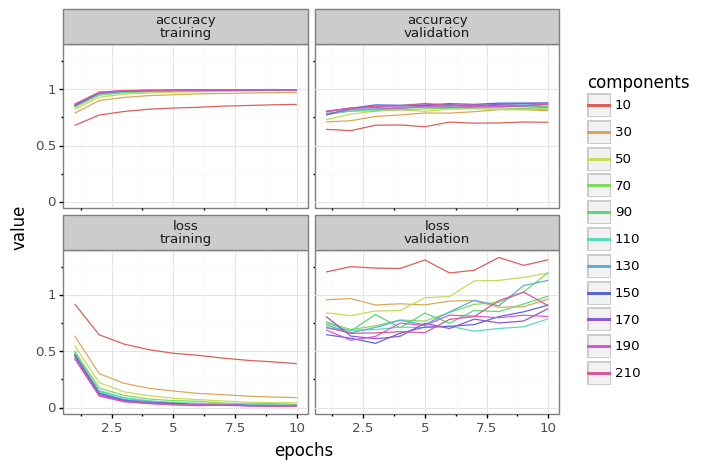

<ggplot: (8742543443271)>

In [45]:
ggplot(df, aes(x='epochs', y='value',color='components')) + \
    geom_line() + \
    facet_wrap(['accuracy','valid']) + \
    theme_bw(base_size=12)

In [46]:
df_loss = pd.DataFrame(
columns = ['components', 'zero_one']
)

losses =[]

for i in range(len(res)):
    losses.append(res[i][2])
components = [i for i in range(10,211,20)]

In [47]:
df_loss = pd.DataFrame( data = [components,losses], index = ['components', 'zero_one']).T

In [48]:
df_loss

,components,zero_one
0,10.0,0.306141
1,30.0,0.186068
2,50.0,0.163611
3,70.0,0.178735
4,90.0,0.149863
5,110.0,0.140238
6,130.0,0.167278
7,150.0,0.121907
8,170.0,0.132906
9,190.0,0.132447


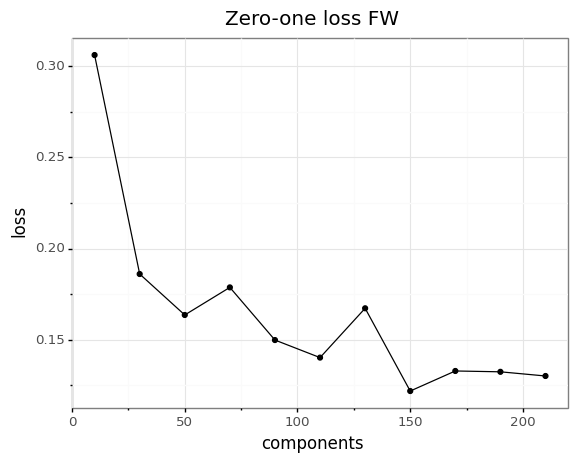

<ggplot: (-9223363294328909333)>

In [49]:
ggplot(df_loss, aes(x='components', y='zero_one')) + \
    geom_line() + \
    geom_point() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss FW") + ylab("loss")

# 1.4  Convolutional Neural Newtworks

## One VGG block CNN


In [50]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "1_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 1,060,138
Trainable params: 1,060,138
Non-trainable params: 0
___________________________________________

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [52]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
                   )

Epoch 1/10
1019/1019 - 11s - loss: 0.2235 - accuracy: 0.9273 - val_loss: 0.1134 - val_accuracy: 0.9629
Epoch 2/10
1019/1019 - 10s - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.1681 - val_accuracy: 0.9614
Epoch 3/10
1019/1019 - 10s - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.0984 - val_accuracy: 0.9782
Epoch 4/10
1019/1019 - 11s - loss: 0.0053 - accuracy: 0.9987 - val_loss: 0.3172 - val_accuracy: 0.9511
Epoch 5/10
1019/1019 - 10s - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.1838 - val_accuracy: 0.9685
Epoch 6/10
1019/1019 - 11s - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.1386 - val_accuracy: 0.9820
Epoch 7/10
1019/1019 - 11s - loss: 0.0047 - accuracy: 0.9993 - val_loss: 0.2024 - val_accuracy: 0.9747
Epoch 8/10
1019/1019 - 10s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.2750 - val_accuracy: 0.9603
Epoch 9/10
1019/1019 - 10s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.2730 - val_accuracy: 0.9746
Epoch 10/10
1019/1019 - 10s - loss: 0.0047 - accuracy: 0.9994 - val_loss:

In [53]:
y_pred = model.predict(x_test)

cnn_loss = [] 
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)
cnn_loss.append(zol)

Zero-one Loss:  0.027497708524289642


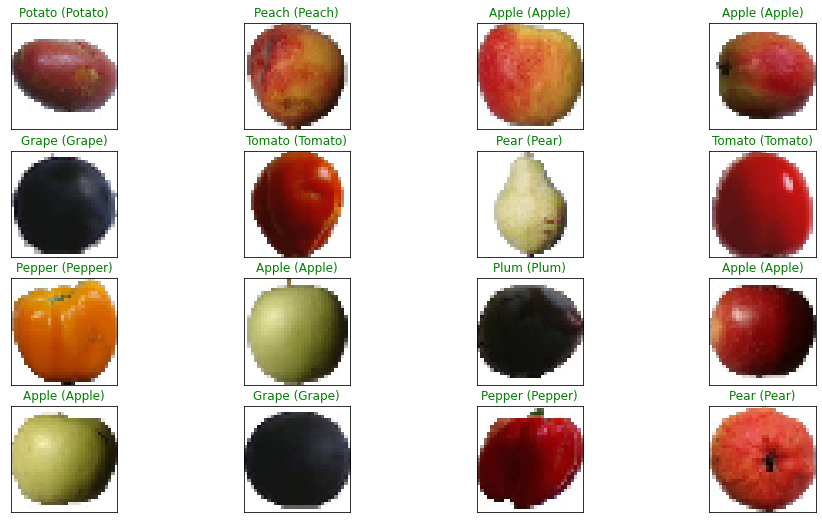

In [54]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



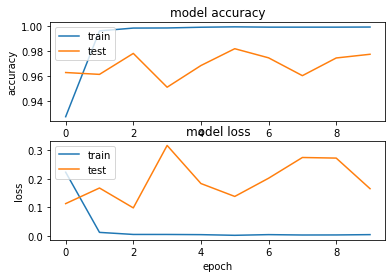

In [55]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()


## Two VGG blocks



In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "2_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)            

In [59]:
history2 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
                   )

Epoch 1/10
1019/1019 - 14s - loss: 0.2448 - accuracy: 0.9161 - val_loss: 0.1503 - val_accuracy: 0.9497
Epoch 2/10
1019/1019 - 13s - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0414 - val_accuracy: 0.9870
Epoch 3/10
1019/1019 - 13s - loss: 0.0170 - accuracy: 0.9939 - val_loss: 0.1593 - val_accuracy: 0.9401
Epoch 4/10
1019/1019 - 13s - loss: 0.0121 - accuracy: 0.9963 - val_loss: 0.0425 - val_accuracy: 0.9852
Epoch 5/10
1019/1019 - 13s - loss: 2.1665e-05 - accuracy: 1.0000 - val_loss: 0.0375 - val_accuracy: 0.9868
Epoch 6/10
1019/1019 - 13s - loss: 9.4074e-06 - accuracy: 1.0000 - val_loss: 0.0352 - val_accuracy: 0.9876
Epoch 7/10
1019/1019 - 13s - loss: 4.9838e-06 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 0.9883
Epoch 8/10
1019/1019 - 14s - loss: 2.7299e-06 - accuracy: 1.0000 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 9/10
1019/1019 - 14s - loss: 1.5548e-06 - accuracy: 1.0000 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 10/10
1019/1019 - 13s - loss: 8.8463e-07 - accu

In [60]:
# evaluate zero-one loss
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)

Zero-one Loss:  0.011915673693858845


## Three VGG blocks

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 128)       

In [62]:
history3 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
     #   shuffle=True
                   )

Epoch 1/10
1019/1019 - 18s - loss: 0.3145 - accuracy: 0.8895 - val_loss: 0.0927 - val_accuracy: 0.9623
Epoch 2/10
1019/1019 - 18s - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.0540 - val_accuracy: 0.9862
Epoch 3/10
1019/1019 - 18s - loss: 0.0434 - accuracy: 0.9867 - val_loss: 0.1021 - val_accuracy: 0.9697
Epoch 4/10
1019/1019 - 18s - loss: 0.0271 - accuracy: 0.9927 - val_loss: 0.0865 - val_accuracy: 0.9701
Epoch 5/10
1019/1019 - 18s - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0244 - val_accuracy: 0.9916
Epoch 6/10
1019/1019 - 18s - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.0373 - val_accuracy: 0.9861
Epoch 7/10
1019/1019 - 18s - loss: 9.9068e-05 - accuracy: 1.0000 - val_loss: 0.0221 - val_accuracy: 0.9935
Epoch 8/10
1019/1019 - 18s - loss: 3.5858e-06 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 0.9947
Epoch 9/10
1019/1019 - 18s - loss: 5.4875e-07 - accuracy: 1.0000 - val_loss: 0.0215 - val_accuracy: 0.9946
Epoch 10/10
1019/1019 - 18s - loss: 2.6546e-07 - accuracy: 1.

In [63]:
# evaluate zero-one loss
y_pred = model.predict(x_test)

zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)


Zero-one Loss:  0.006416131989000917


## Three VGG blocks with Dropout


In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block_dropout"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)        

In [65]:
history4 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
                   )

Epoch 1/10
1019/1019 - 19s - loss: 0.4896 - accuracy: 0.8232 - val_loss: 0.2428 - val_accuracy: 0.9187
Epoch 2/10
1019/1019 - 19s - loss: 0.0667 - accuracy: 0.9784 - val_loss: 0.1067 - val_accuracy: 0.9626
Epoch 3/10
1019/1019 - 19s - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.1125 - val_accuracy: 0.9638
Epoch 4/10
1019/1019 - 19s - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0457 - val_accuracy: 0.9821
Epoch 5/10
1019/1019 - 19s - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.2274 - val_accuracy: 0.9474
Epoch 6/10
1019/1019 - 19s - loss: 0.0239 - accuracy: 0.9932 - val_loss: 0.0218 - val_accuracy: 0.9913
Epoch 7/10
1019/1019 - 19s - loss: 0.0249 - accuracy: 0.9937 - val_loss: 0.0643 - val_accuracy: 0.9849
Epoch 8/10
1019/1019 - 19s - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.1177 - val_accuracy: 0.9707
Epoch 9/10
1019/1019 - 19s - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.0798 - val_accuracy: 0.9840
Epoch 10/10
1019/1019 - 19s - loss: 0.0195 - accuracy: 0.9952 - val_loss:

In [66]:
# evaluate zero-one loss
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)

Zero-one Loss:  0.02474793767186068


## Three VGG blocks with Dropout and Batch Normalization


In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False, input_shape = (32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(128, (3, 3), padding = "same", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = "adam", loss='categorical_crossentropy', metrics=['accuracy'])

net_name = "3_VGG_block_dropout_BN"

model.summary()

# log dir for saving TensorBoard logs
logdir = os.path.join("conv_nets", net_name)

# callback to run TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)      

In [68]:
history5 = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
                   )

Epoch 1/10
1019/1019 - 21s - loss: 0.3833 - accuracy: 0.8778 - val_loss: 0.1246 - val_accuracy: 0.9563
Epoch 2/10
1019/1019 - 21s - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.1357 - val_accuracy: 0.9569
Epoch 3/10
1019/1019 - 21s - loss: 0.0504 - accuracy: 0.9855 - val_loss: 0.1437 - val_accuracy: 0.9509
Epoch 4/10
1019/1019 - 21s - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.0560 - val_accuracy: 0.9773
Epoch 5/10
1019/1019 - 21s - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0190 - val_accuracy: 0.9940
Epoch 6/10
1019/1019 - 21s - loss: 0.0231 - accuracy: 0.9932 - val_loss: 0.0196 - val_accuracy: 0.9932
Epoch 7/10
1019/1019 - 21s - loss: 0.0254 - accuracy: 0.9927 - val_loss: 0.3206 - val_accuracy: 0.9378
Epoch 8/10
1019/1019 - 21s - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.0551 - val_accuracy: 0.9889
Epoch 9/10
1019/1019 - 21s - loss: 0.0156 - accuracy: 0.9953 - val_loss: 0.3996 - val_accuracy: 0.9086
Epoch 10/10
1019/1019 - 21s - loss: 0.0127 - accuracy: 0.9958 - val_loss:

In [69]:
# evaluate zero-one loss
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)


Zero-one Loss:  0.00458295142071494


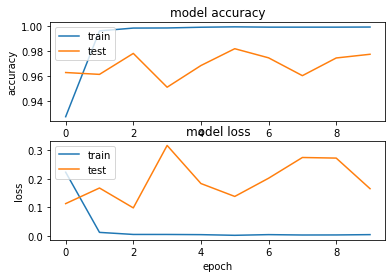

In [70]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()





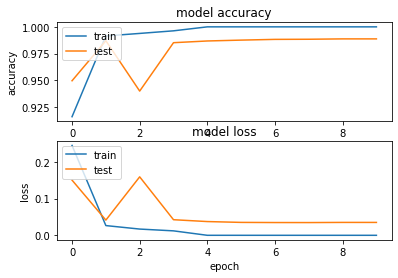

In [71]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history2.history['accuracy'])  
plt.plot(history2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history2.history['loss'])  
plt.plot(history2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

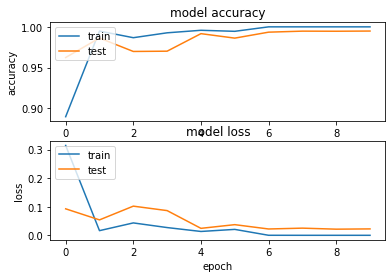

In [72]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history3.history['accuracy'])  
plt.plot(history3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history3.history['loss'])  
plt.plot(history3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

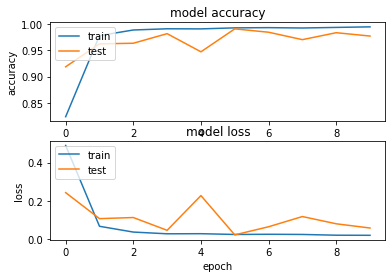

In [73]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history4.history['accuracy'])  
plt.plot(history4.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history4.history['loss'])  
plt.plot(history4.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

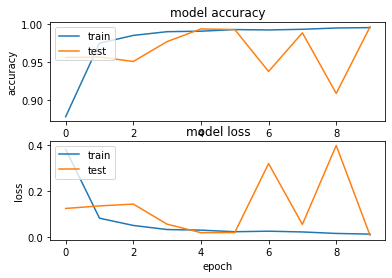

In [74]:
#Finally lets visualize the loss and accuracy wrt epochs

import matplotlib.pyplot as plt 
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history5.history['accuracy'])  
plt.plot(history5.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history5.history['loss'])  
plt.plot(history5.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [75]:
cnn_loss

[0.027497708524289642,
 0.011915673693858845,
 0.006416131989000917,
 0.02474793767186068,
 0.00458295142071494]

In [76]:
df_cnn_loss = pd.DataFrame(
columns = ['type', 'zero_one']
)

types = ["1VGG","2VGG","3VGG","3VGG-drop", "3VGG-drop-norm"]
df_cnn_loss = pd.DataFrame( data = [types,cnn_loss], index = ['types', 'zero_one']).T

In [77]:
df_cnn_loss

,types,zero_one
0,1VGG,0.0274977
1,2VGG,0.0119157
2,3VGG,0.00641613
3,3VGG-drop,0.0247479
4,3VGG-drop-norm,0.00458295


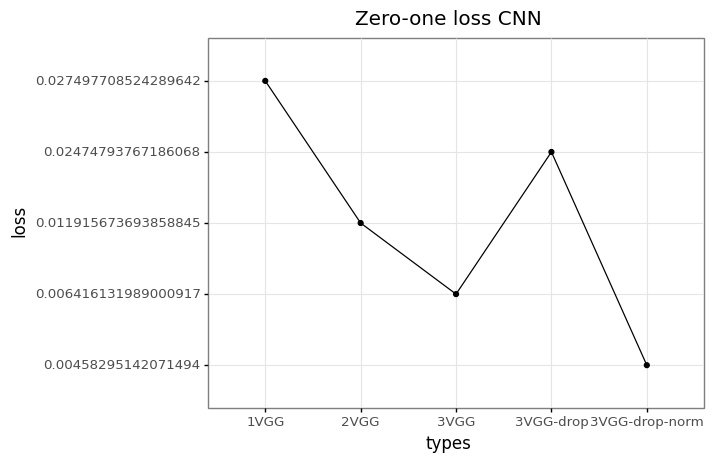

<ggplot: (-9223363294336681030)>

In [78]:
ggplot(df_cnn_loss, aes(x='types', y='zero_one',group=1)) + \
    geom_point() + \
    geom_line() + \
    theme_bw(base_size=12) + ggtitle("Zero-one loss CNN") + ylab("loss")


# 1.5 LeNet Neural Networks


In [79]:
#leNet Neural Network

input_shape = (32,32,3)
num_classes = 10
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'tanh'),
    tf.keras.layers.Dense(84, activation = 'tanh'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()



Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 120)               69240     
_________________________________________________________________
dense_33 (Dense)             (None, 84)              

In [80]:
history = model.fit(x_train, y_train,
                    batch_size = 32,
                    epochs = 10,
                    validation_data=(x_valid, y_valid),
                    verbose = 2
                    )

Epoch 1/10
1019/1019 - 8s - loss: 0.3548 - accuracy: 0.8943 - val_loss: 0.1513 - val_accuracy: 0.9493
Epoch 2/10
1019/1019 - 7s - loss: 0.0149 - accuracy: 0.9981 - val_loss: 0.1075 - val_accuracy: 0.9712
Epoch 3/10
1019/1019 - 7s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1006 - val_accuracy: 0.9752
Epoch 4/10
1019/1019 - 7s - loss: 7.9924e-04 - accuracy: 1.0000 - val_loss: 0.0955 - val_accuracy: 0.9772
Epoch 5/10
1019/1019 - 7s - loss: 0.0094 - accuracy: 0.9980 - val_loss: 1.0470 - val_accuracy: 0.7565
Epoch 6/10
1019/1019 - 7s - loss: 0.0259 - accuracy: 0.9923 - val_loss: 0.0785 - val_accuracy: 0.9801
Epoch 7/10
1019/1019 - 7s - loss: 5.9479e-04 - accuracy: 1.0000 - val_loss: 0.0810 - val_accuracy: 0.9807
Epoch 8/10
1019/1019 - 7s - loss: 3.0898e-04 - accuracy: 1.0000 - val_loss: 0.0809 - val_accuracy: 0.9795
Epoch 9/10
1019/1019 - 7s - loss: 1.6621e-04 - accuracy: 1.0000 - val_loss: 0.0828 - val_accuracy: 0.9822
Epoch 10/10
1019/1019 - 7s - loss: 9.6183e-05 - accuracy: 1.0000 -

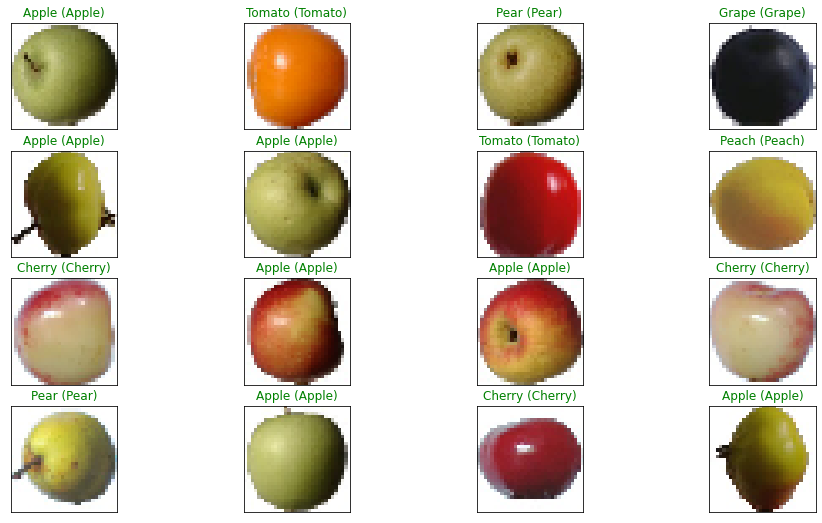

In [81]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

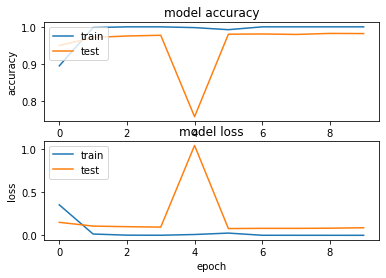

In [82]:
plt.figure(1)  
   
 # summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
 # summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()



In [84]:
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)

print("Zero-one Loss: ", zol)

cnn_loss.append(zol)

Zero-one Loss:  0.01695692025664528


# 1.6 MobileNetV2

In [85]:
from keras.applications import MobileNetV2

model = MobileNetV2(input_shape=(32, 32, 3), alpha=1, weights=None,classes=10)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())
print('Compiled!')



Model: "mobilenetv2_1.00_32"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 33, 33, 3)    0           input_12[0][0]                   
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
________________________________________________________________________________

In [86]:
history = model.fit(x_train,y_train,
        batch_size = 32,
        epochs=10,
        validation_data=(x_valid, y_valid),
        verbose=2, 
                   )

Train on 32607 samples, validate on 8724 samples
Epoch 1/10
 - 156s - loss: 0.5908 - accuracy: 0.8162 - val_loss: 2.2007 - val_accuracy: 0.1948
Epoch 2/10
 - 137s - loss: 0.1659 - accuracy: 0.9531 - val_loss: 2.1975 - val_accuracy: 0.1582
Epoch 3/10
 - 140s - loss: 0.1207 - accuracy: 0.9682 - val_loss: 2.2501 - val_accuracy: 0.1058
Epoch 4/10
 - 146s - loss: 0.0966 - accuracy: 0.9738 - val_loss: 2.1798 - val_accuracy: 0.1948
Epoch 5/10
 - 147s - loss: 0.1478 - accuracy: 0.9628 - val_loss: 0.6394 - val_accuracy: 0.8278
Epoch 6/10
 - 146s - loss: 0.0595 - accuracy: 0.9858 - val_loss: 0.3919 - val_accuracy: 0.8900
Epoch 7/10
 - 146s - loss: 0.0707 - accuracy: 0.9847 - val_loss: 1.3431 - val_accuracy: 0.7689
Epoch 8/10
 - 147s - loss: 0.0547 - accuracy: 0.9868 - val_loss: 6.8921 - val_accuracy: 0.4642
Epoch 9/10
 - 145s - loss: 0.0593 - accuracy: 0.9861 - val_loss: 1.2388 - val_accuracy: 0.8661
Epoch 10/10
 - 143s - loss: 0.0509 - accuracy: 0.9882 - val_loss: 3.2225 - val_accuracy: 0.7672


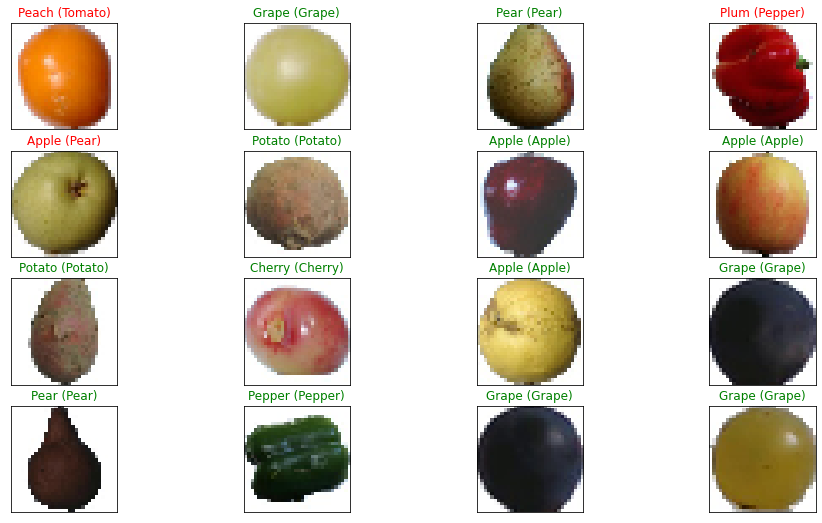

In [87]:
y_pred = model.predict(x_test)

# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(TYPES[pred_idx], TYPES[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))



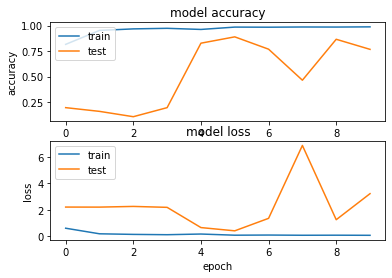

In [88]:
#Finally lets visualize the loss and accuracy wrt epochs

plt.figure(1)  
   
# summarize history for accuracy  
   
plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
   
# summarize history for loss  
   
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

In [89]:
y_pred = model.predict(x_test)
zol = zero_one(y_pred, y_test)
cnn_loss.append(zol)
print("Zero-one Loss: ", zol)


Zero-one Loss:  0.20577451879010084


# 1.7 Summary results

In [90]:
df_cnn_loss = pd.DataFrame(
columns = ['type', 'zero_one']
)

types = ["1VGG","2VGG","3VGG","3VGG-drop", "3VGG-drop-norm","LeNet","MobileNetV2"]
df_cnn_loss = pd.DataFrame( data = [types,cnn_loss], index = ['types', 'zero_one']).T



df_new = df_loss.rename(columns={'components': 'types'})
df_new['types'] = df_new['types'].astype(str)



In [91]:
frames = [df_new, df_cnn_loss]
result = pd.concat(frames)
result = result.sort_values(by=['zero_one'])

result = result.reset_index(drop=True)



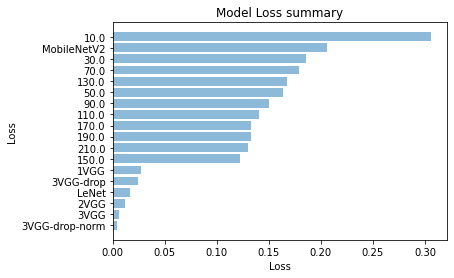

In [92]:

plt.barh(  result['types'].values,result['zero_one'].values , align='center', alpha=0.5)
plt.xlabel('Loss')
plt.ylabel("Loss")
plt.title('Model Loss summary')

plt.show()

In [93]:
%load_ext tensorboard

%tensorboard --logdir conv_nets

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 3099), started 5:10:24 ago. (Use '!kill 3099' to kill it.)

<IPython.core.display.Javascript object>